In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

In [32]:
df_train = pd.read_parquet("./data/df_train_preprocessed.parquet")
df_test = pd.read_parquet("./data/df_test_preprocessed.parquet")
df_val = pd.read_parquet("./data/df_val_preprocessed.parquet")

X_train, y_train = df_train.drop(columns="isFraud"), df_train["isFraud"]
X_val, y_val = df_val.drop(columns="isFraud"), df_val["isFraud"]
X_test, y_test = df_test.drop(columns="isFraud"), df_test["isFraud"]

In [33]:
def evaluate_model(model, X, y, title="Dataset"):
    preds = model.predict(X)
    proba = model.predict_proba(X)[:, 1]
    print(f"\n--- Evaluation on {title} ---")
    print(f"Accuracy: {accuracy_score(y, preds):.4f}")
    print(f"Precision: {precision_score(y, preds):.4f}")
    print(f"Recall: {recall_score(y, preds):.4f}")
    print(f"F1: {f1_score(y, preds):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y, proba):.4f}")
    print(classification_report(y, preds, digits=4))
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [34]:
xgb_model = XGBClassifier(
    n_estimators=30000,
    learning_rate=0.005,
    max_depth=6,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    colsample_bylevel=0.9,
    colsample_bynode=0.9,
    reg_lambda=2.0,
    reg_alpha=0.5,
    tree_method="hist",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.43190
[1]	validation_0-auc:0.47971
[2]	validation_0-auc:0.51272
[3]	validation_0-auc:0.55336
[4]	validation_0-auc:0.56077
[5]	validation_0-auc:0.56628
[6]	validation_0-auc:0.55696
[7]	validation_0-auc:0.54634
[8]	validation_0-auc:0.56261
[9]	validation_0-auc:0.53174
[10]	validation_0-auc:0.50234
[11]	validation_0-auc:0.46388
[12]	validation_0-auc:0.46088
[13]	validation_0-auc:0.48350
[14]	validation_0-auc:0.49065
[15]	validation_0-auc:0.46492
[16]	validation_0-auc:0.44696
[17]	validation_0-auc:0.43955
[18]	validation_0-auc:0.44767
[19]	validation_0-auc:0.45339
[20]	validation_0-auc:0.45541
[21]	validation_0-auc:0.42897
[22]	validation_0-auc:0.42978
[23]	validation_0-auc:0.43040
[24]	validation_0-auc:0.42949
[25]	validation_0-auc:0.43174
[26]	validation_0-auc:0.43258
[27]	validation_0-auc:0.44013
[28]	validation_0-auc:0.42831
[29]	validation_0-auc:0.42531
[30]	validation_0-auc:0.41388
[31]	validation_0-auc:0.40623
[32]	validation_0-auc:0.40444
[33]	validation_0-au

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,0.9
,colsample_bynode,0.9
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'



--- Evaluation on Dataset ---
Accuracy: 0.9674
Precision: 0.9664
Recall: 0.9684
F1: 0.9674
ROC-AUC: 0.9955
              precision    recall  f1-score   support

         0.0     0.9683    0.9663    0.9673     27443
         1.0     0.9664    0.9684    0.9674     27443

    accuracy                         0.9674     54886
   macro avg     0.9674    0.9674    0.9674     54886
weighted avg     0.9674    0.9674    0.9674     54886



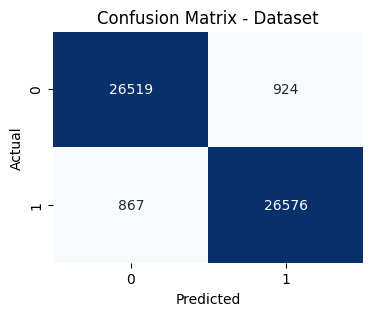

In [35]:
y_pred_train = xgb_model.predict(X_train)
evaluate_model(xgb_model, X_train, y_train)


--- Evaluation on Dataset ---
Accuracy: 0.7410
Precision: 0.0037
Recall: 0.7692
F1: 0.0073
ROC-AUC: 0.7427
              precision    recall  f1-score   support

         0.0     0.9996    0.7409    0.8510     10487
         1.0     0.0037    0.7692    0.0073        13

    accuracy                         0.7410     10500
   macro avg     0.5016    0.7551    0.4292     10500
weighted avg     0.9984    0.7410    0.8500     10500



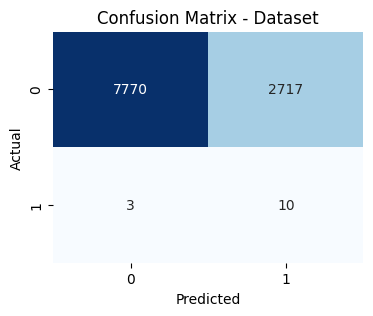

In [36]:
y_pred_test = xgb_model.predict(X_test)
evaluate_model(xgb_model, X_test, y_test)